### Model to reassign all true uniques: set coverage

Read individual data

- Geographic level: tract
- Attributes: VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63)

In [87]:
import pandas as pd
import numpy as np

filename_hist = 'data/franklin_hist.csv'
hist = pd.read_csv(filename_hist)

# block to tract
hist['TRACT'] = hist['GEOID10'].astype(str).str[:11]
col_names = hist.columns.to_numpy()
col_names = np.delete(col_names, [0, -1])
hist = hist.groupby('TRACT').sum()[col_names]
hist = hist.reset_index()
hist

,TRACT,00000000,00000001,00000002,00000003,00000004,00000005,00000006,00000007,00000008,...,07010153,07010154,07010155,07010156,07010157,07010158,07010159,07010160,07010161,07010162
0,39049000110,438,6,0,7,0,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1,39049000120,467,4,0,11,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
2,39049000210,430,11,0,6,0,4,4,1,4,...,0,0,0,0,0,0,0,0,0,0
3,39049000220,653,3,1,12,0,6,7,0,6,...,0,0,0,0,0,0,0,0,0,0
4,39049000310,313,205,0,17,0,2,19,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,5,2,22,...,0,0,0,0,0,0,0,0,0,0
280,39049010601,1408,36,0,146,0,3,12,0,15,...,0,0,0,0,0,0,0,0,0,0
281,39049010602,1585,45,3,139,0,4,7,2,9,...,0,0,0,0,0,0,0,0,0,0
282,39049010700,83,11,0,4,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# HHGQ (8) $*$ VOTINGAGE (2) $*$ HISPANIC (2) $*$ CENRACE (63) to VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
n2, n3, n4 = 2, 2, 63

for y in range(n2):  # voting age
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist.columns if y in col[2:4] and len(col)==8]

    for z in range(n3):  # ethnicity
        z = '{number:0{width}d}'.format(width=2, number=z)
        col_names2 = [col for col in col_names if z in col[4:6]]

        col_two_or_more_races = []
        for x in range(n4):  # race
            if x >= 0 and x <= 5:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                hist[x + y + z] = hist[col_names3].sum(axis=1)
            else:
                x = '{number:0{width}d}'.format(width=2, number=x)
                col_names3 = [col for col in col_names2 if x in col[6:8]]
                col_two_or_more_races.extend(col_names3)
        hist['06' + y + z] = hist[col_two_or_more_races].sum(axis=1)

hist.drop([col for col in hist.columns if len(col)==8], axis=1, inplace=True)
hist            

,TRACT,000000,010000,020000,030000,040000,050000,060000,000001,010001,...,040100,050100,060100,000101,010101,020101,030101,040101,050101,060101
0,39049000110,438,6,0,7,0,4,6,29,0,...,0,2,1,17,3,0,0,0,6,0
1,39049000120,467,4,0,11,0,2,6,13,0,...,1,0,3,18,0,0,0,0,4,0
2,39049000210,430,11,0,6,0,4,13,10,0,...,0,2,4,34,0,0,0,0,4,0
3,39049000220,653,3,1,12,0,6,13,20,0,...,0,6,4,16,0,2,0,0,8,1
4,39049000310,313,205,0,17,0,2,25,15,1,...,2,5,8,40,1,1,0,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,1821,35,1,409,0,2,33,27,0,...,1,8,8,70,0,1,0,0,19,0
280,39049010601,1408,36,0,146,0,3,32,16,3,...,0,2,4,86,0,0,0,0,13,1
281,39049010602,1585,45,3,139,0,4,19,13,1,...,0,8,11,71,2,2,0,0,25,0
282,39049010700,83,11,0,4,0,0,2,6,1,...,1,2,2,10,0,0,0,0,14,0


Aggregated data

In [89]:
# HISPANIC (2) $*$ RACE (7)
n3, n4 = 2, 7

hist2 = hist.copy()
for x in range(n3):  # ethnicity
    x = '{number:0{width}d}'.format(width=2, number=x)
    for y in range(n4):  # race
        y = '{number:0{width}d}'.format(width=2, number=y)
        col_names = [col for col in hist2.columns if x in col[4:6] and y in col[0:2]]
        hist2[y + x] = hist2[col_names].sum(axis=1)

hist2.drop([col for col in hist2.columns if len(col)==6], axis=1, inplace=True)
hist2    

,TRACT,0000,0100,0200,0300,0400,0500,0600,0001,0101,0201,0301,0401,0501,0601
0,39049000110,3171,37,1,36,0,6,7,46,3,1,0,0,7,1
1,39049000120,2985,44,1,42,1,2,9,31,0,2,0,0,5,0
2,39049000210,2729,52,5,32,0,6,17,44,0,0,0,0,4,0
3,39049000220,3500,32,2,55,0,12,17,36,0,2,0,0,12,6
4,39049000310,2080,737,2,70,2,7,33,55,2,1,0,0,54,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,39049010500,6402,108,3,1177,1,10,41,97,0,1,2,0,33,4
280,39049010601,3831,125,3,453,0,5,36,102,3,0,0,0,27,3
281,39049010602,5402,154,6,420,0,12,30,84,3,3,0,0,42,1
282,39049010700,1046,118,4,61,1,2,4,16,1,0,0,0,17,0


In [90]:
# RACE (7)
n4 = 7

hist3 = hist.copy()
for y in range(n4):  # race
    y = '{number:0{width}d}'.format(width=2, number=y)
    col_names = [col for col in hist3.columns if y in col[0:2]]
    hist3[y] = hist3[col_names].sum(axis=1)

hist3.drop([col for col in hist3.columns if len(col)==6], axis=1, inplace=True)
hist3    

,TRACT,00,01,02,03,04,05,06
0,39049000110,3217,40,2,36,0,13,8
1,39049000120,3016,44,3,42,1,7,9
2,39049000210,2773,52,5,32,0,10,17
3,39049000220,3536,32,4,55,0,24,23
4,39049000310,2135,739,3,70,2,61,37
...,...,...,...,...,...,...,...,...
279,39049010500,6499,108,4,1179,1,43,45
280,39049010601,3933,128,3,453,0,32,39
281,39049010602,5486,157,9,420,0,54,31
282,39049010700,1062,119,4,61,1,19,4


Disclosure risks before protection

In [91]:
import numpy as np

# VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
pd.set_option('use_inf_as_na', True)
a = hist.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

# HISPANIC (2) $*$ RACE (7)
a = hist2.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

# RACE (7)
a = hist3.iloc[:,1:].apply(lambda x: 1 / x).to_numpy()
a[~np.isfinite(a)] = 0
print("Identification prob: ", np.sum(a) / a.size)

Identification prob:  0.1667384238525854
Identification prob:  0.15656620222683154
Identification prob:  0.09411737298135261


In [92]:
import numpy as np

# VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
u = hist.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

# HISPANIC (2) $*$ RACE (7)
u = hist2.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

# RACE (7)
u = hist3.iloc[:,1:]
print("Unique prob: ", np.count_nonzero(u == 1) / u.size)
print(np.count_nonzero(u == 1))

Unique prob:  0.08601609657947686
684
Unique prob:  0.08098591549295775
322
Unique prob:  0.041750503018108655
83


Maps before protection

(<Figure size 1296x864 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d52a4496c8>)

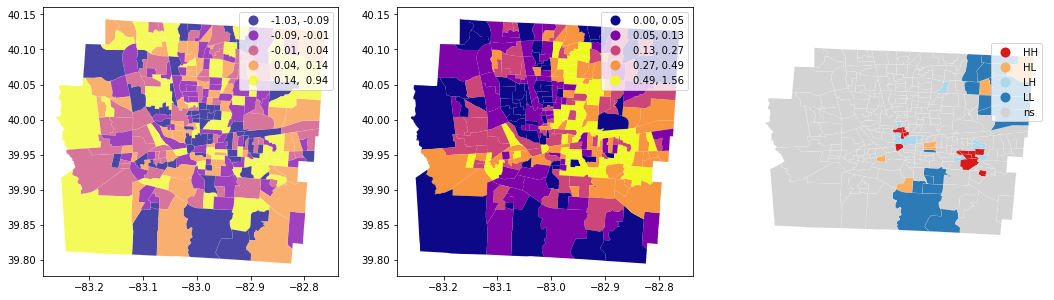

In [93]:
import numpy as np
import geopandas as gpd
from pysal.lib import weights
from pysal.explore import esda
import matplotlib.pyplot as plt  # Graphics
from splot import esda as esdaplot

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged["0101_pct"] = merged["0101"]/(merged["0000"]+merged["0100"]+merged["0200"]+merged["0300"]+merged["0400"]+merged["0500"]+merged["0600"]+merged["0001"]+merged["0101"]+merged["0201"]+merged["0301"]+merged["0401"]+merged["0501"]+merged["0601"]) * 100
merged = merged.sort_index()

gdf['GEOID10'] = gdf['GEOID10'].astype(str)
w = weights.distance.KNN.from_dataframe(gdf, k=20)
w.transform = 'R'
lisa = esda.moran.Moran_Local(merged["0101_pct"], w)

# Set up figure and axes
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Assign new column with local statistics on-the-fly
merged.assign(Is=lisa.Is).plot(
    column='Is', 
    cmap='plasma', 
    scheme='quantiles',
    k=5, 
    edgecolor='white', 
    linewidth=0.1, 
    alpha=0.75,
    legend=True,
    ax=axs[0]
)

merged.plot(column=merged["0101_pct"], scheme='quantiles', cmap='plasma', legend=True, ax=axs[1])

# Grab second axis of local statistics
esdaplot.lisa_cluster(lisa, gdf, p=0.05, ax=axs[2])

Model inputs

In [94]:
import numpy as np

# define all the input data for the model
I, K = hist.shape[0], hist.shape[1] - 1
nj = 20
r = 3

V = []
for k in range(1, K+1):
    V.append(hist.index[(hist.iloc[:,k] <= r) & (hist.iloc[:,k] > 0)].tolist())

count = 0
for listElem in V:
    count += len(listElem)  
print(count)

A = hist.iloc[:,1:].to_numpy()
print(A.shape, A[0])

W = np.empty([I, I, K])
for i in range(I):
    for j in range(I):
        for k in range(K):
            if A[i, k] == 0 or A[j, k] == 0:
                W[i, j, k] = 50
            else:
                W[i, j, k] = 1 / A[i, k] + 1 / A[j, k]
print(W.shape, W[0])            

1497
(284, 28) [ 438    6    0    7    0    4    6   29    0    1    0    0    1    1
 2733   31    1   29    0    2    1   17    3    0    0    0    6    0]
(284, 284, 28) [[4.56621005e-03 3.33333333e-01 5.00000000e+01 ... 5.00000000e+01
  3.33333333e-01 5.00000000e+01]
 [4.42443265e-03 4.16666667e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 [4.60868642e-03 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  4.16666667e-01 5.00000000e+01]
 ...
 [2.91401985e-03 1.88888889e-01 5.00000000e+01 ... 5.00000000e+01
  2.06666667e-01 5.00000000e+01]
 [1.43312978e-02 2.57575758e-01 5.00000000e+01 ... 5.00000000e+01
  2.38095238e-01 5.00000000e+01]
 [5.00000000e+01 5.00000000e+01 5.00000000e+01 ... 5.00000000e+01
  5.00000000e+01 5.00000000e+01]]


Coverage I: all except the origin and other uniques

In [95]:
import numpy as np

## define coverage aijk
T = np.ones((I, I, K))

for i in range(I): 
    for j in range(I):
        for k in range(K):
            if i == j or j in V[k]:
                T[i, j, k] = 0
T   

array([[[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

Coverage II: neighboring

In [96]:
# import numpy as np
# import geopandas as gpd
# from pysal.lib import weights

# filename_gdf = 'data/franklin_tract10.json'
# gdf = gpd.read_file(filename_gdf)
# gdf['GEOID10'] = gdf['GEOID10'].astype(str)
# wr = weights.distance.KNN.from_dataframe(gdf, k=10)
# print(wr.neighbors[0])

# ## define coverage aijk
# T = np.zeros((I, I, K))
# for i in wr.neighbors:
#     neighbors_idx = wr.neighbors[i]
#     for j in neighbors_idx:
#         geoid = gdf.loc[[j],'GEOID10'].values[0]
#         # idx = hist.loc[hist["TRACT"] == geoid].index[0]
#         for k in range(K):
#             if j not in V[k]:
#                 T[i, j, k] = 1
# T        

Run model

In [97]:
import pandas as pd
from gurobipy import Model, GRB, LinExpr, quicksum

# initialize model
m = Model('td')
# m.Params.LogToConsole = 0

# add objective function
obj = LinExpr()

# add decision variables and objective function
theta = {}
for k in range(K):
    if len(V[k]) == 0:
        continue
    for i in V[k]:
        for j in range(I):
            # decision variables
            theta[i, j, k] = m.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=1, name="theta_%d_%d_%d"%(i, j, k))
            # m.update()
            # objective
            obj += theta[i, j, k] * A[i, k] * W[i, j, k]

        # add constraints
        m.addConstr(quicksum(theta[i, j, k] for j in range(I)) == 1)
        m.addConstr(quicksum(T[i, j, k] * theta[i, j, k] for j in range(I)) == 1)

for j in range(I):
    m.addConstr(quicksum(quicksum(theta[i, j, k] * A[i, k] for i in V[k]) for k in range(K)) <= nj)

m.setObjective(obj, GRB.MINIMIZE)

m.update()
m.optimize()

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 3278 rows, 425148 columns and 1145003 nonzeros
Model fingerprint: 0xa2047b6a
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve time: 0.86s
Presolved: 3278 rows, 425148 columns, 1145003 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.876e+04
 Factor NZ  : 6.437e+04 (roughly 10 MBytes of memory)
 Factor Ops : 1.140e+07 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.91555337e+06  0.00000000e+00  2.44e+02 0.00e+00  7.91e+01     1s
   1   2.49374420e+05 -3.33030813e+04  3.47e+01 1.71e-13 

In [98]:
# for var in m.getVars():
#     print(var.VarName, var.X)

Disclosure risks after protection: VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)

In [99]:
theta_all = np.empty([I, I, K])
for k in range(K):
    for i in range(I):
        if i not in V[k] and A[i, k] != 0:
            theta_all[i, i, k] = 1

for var in m.getVars():
    name = var.VarName.split("_")
    theta_all[int(name[1]), int(name[2]), int(name[3])] = var.X

# check
np.sum(theta_all, axis=1)

array([[1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
p = np.ones([I, K])
for k in range(K):
    for j in range(I):
        sum = 0
        for i in V[k]:
            if i != j:
                sum += theta_all[i, j, k] * A[i, k]
        p[j, k] = theta_all[j, j, k] / (theta_all[j, j, k] * A[j, k] + sum)

p[~np.isfinite(p)] = 0
print("Identification prob: ", np.sum(p) / p.size)

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Identification prob:  0.03546601373490336


In [101]:
v = 0
for k in range(K):
    for i in range(I):
        if A[i, k] == 1 and theta_all[i, i, k] == 1:
            v += 1

print("Unique prob: ", np.sum(v) / (I * K))

Unique prob:  0.0


Disclosure risks after protection: HISPANIC (2) $*$ RACE (7)

In [102]:
K2 = hist2.shape[1] - 1
Q2 = np.empty([K2, K])

for idx2, col2 in enumerate(hist2.iloc[:,1:].columns):
    x = col2[0:2]
    y = col2[2:4]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2] and y == col[4:6]:
            Q2[idx2, idx] = 1
        else:
            Q2[idx2, idx] = 0

theta2_all = np.empty([I, I, K2])
for k2 in range(K2):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q2[k2, k] * theta_all[i, j, k] * A[i, k]
                sum2 += Q2[k2, k] * A[i, k]
            theta2_all[i, j, k2] = sum1 / sum2
            
theta2_all[~np.isfinite(theta2_all)] = 0
# check
np.sum(theta2_all, axis=1)        

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [103]:
p = np.ones([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for k in range(K):
            sum += Q2[k2, k] * theta_all[j, j, k] * A[j, k] 
            for i in V[k]:
                if i != j:
                    sum += Q2[k2, k] * theta_all[i, j, k] * A[i, k]
        p[j, k2] = theta2_all[j, j, k2] / sum
p[~np.isfinite(p)] = 0
print("Identification prob: ", np.sum(p) / p.size)

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Identification prob:  0.029240924132078013


In [104]:
v = 0
A2 = hist2.iloc[:,1:].to_numpy()
for k2 in range(K2):
    for i in range(I):
        if A2[i, k2] == 1 and theta2_all[i, i, k2] == 1:
            v += 1

print("Unique prob: ", np.sum(v) / (I * K2))

Unique prob:  0.0


Disclosure risks after protection: RACE (7)

In [105]:
K3 = hist3.shape[1] - 1
Q3 = np.empty([K3, K])

for idx3, col3 in enumerate(hist3.iloc[:,1:].columns):
    x = col3[0:2]
    for idx, col in enumerate(hist.iloc[:,1:].columns):
        if x == col[0:2]:
            Q3[idx3, idx] = 1
        else:
            Q3[idx3, idx] = 0

theta3_all = np.empty([I, I, K3])
for k3 in range(K3):
    for i in range(I):
        for j in range(I):
            sum1, sum2 = 0, 0
            for k in range(K):
                sum1 += Q3[k3, k] * theta_all[i, j, k] * A[i, k]
                sum2 += Q3[k3, k] * A[i, k]
            theta3_all[i, j, k3] = sum1 / sum2
            
theta3_all[~np.isfinite(theta3_all)] = 0
# check
np.sum(theta3_all, axis=1)        

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [106]:
p = np.ones([I, K3])
for k3 in range(K3):
    for j in range(I):
        sum = 0
        for k in range(K):
            sum += Q3[k3, k] * theta_all[j, j, k] * A[j, k] 
            for i in V[k]:
                if i != j:
                    sum += Q3[k3, k] * theta_all[i, j, k] * A[i, k]
        p[j, k3] = theta3_all[j, j, k3] / sum
p[~np.isfinite(p)] = 0
print("Identification prob: ", np.sum(p) / p.size)

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Identification prob:  0.026407791873384583


In [107]:
v = 0
A3 = hist3.iloc[:,1:].to_numpy()
for k3 in range(K3):
    for i in range(I):
        if A3[i, k3] == 1 and theta3_all[i, i, k3] == 1:
            v += 1

print("Unique prob: ", np.sum(v) / (I * K3))

Unique prob:  0.0


SMAPE and penalized MAPE

In [108]:
# VOTINGAGE (2) $*$ HISPANIC (2) $*$ RACE (7)
delta = np.empty([I, K])
delta_p = np.empty([I, I, K])
for k in range(K):
    for j in range(I):
        sum = 0
        for i in V[k]:
            delta_p[i, j, k] = theta_all[i, j, k] * A[i, k] * W[i, j, k]
            if i != j:
                sum += theta_all[i, j, k] * A[i, k]
        new = theta_all[j, j, k] * A[j, k] + sum
        delta[j, k] = abs(A[j, k] - new) / (A[j, k] + new)

delta[~np.isfinite(delta)] = 0
delta_p[~np.isfinite(delta_p)] = 0
print("SMAPE: ", np.sum(delta) / (I * K))
print("P-MAPE: ", np.sum(delta_p) / (I * K))

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


SMAPE:  0.19601119409579684
P-MAPE:  0.35711290566663895


In [109]:
# HISPANIC (2) $*$ RACE (7)
delta2 = np.empty([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in V[k]:
            if i != j:
                sum += theta2_all[i, j, k2] * A2[i, k2]
        new = theta2_all[j, j, k2] * A2[j, k2] + sum
        delta2[j, k2] = abs(A2[j, k2] - new) / (A2[j, k2] + new)

delta2[~np.isfinite(delta2)] = 0
print("SMAPE: ", np.sum(delta2) / (I * K2))

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


SMAPE:  0.21641389785697024


In [110]:
# RACE (7)
delta3 = np.empty([I, K3])
for k3 in range(K3):
    for j in range(I):
        sum = 0
        for i in V[k]:
            if i != j:
                sum += theta3_all[i, j, k3] * A3[i, k3]
        new = theta3_all[j, j, k3] * A3[j, k3] + sum
        delta3[j, k3] = abs(A3[j, k3] - new) / (A3[j, k3] + new)

delta3[~np.isfinite(delta3)] = 0
print("SMAPE: ", np.sum(delta3) / (I * K3))

SMAPE:  0.14578551024282635


C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Maps after protection

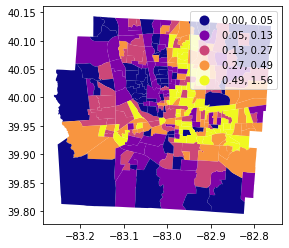

In [124]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

filename_gdf = 'data/franklin_tract10.json'
gdf = gpd.read_file(filename_gdf)
merged = gdf.set_index('GEOID10').join(hist2.set_index('TRACT'))
merged["0101_pct_before"] = merged["0101"]/(merged["0000"]+merged["0100"]+merged["0200"]+merged["0300"]+merged["0400"]+merged["0500"]+merged["0600"]+merged["0001"]+merged["0101"]+merged["0201"]+merged["0301"]+merged["0401"]+merged["0501"]+merged["0601"]) * 100
merged = merged.sort_index()
merged.plot(column=merged["0101_pct_before"], scheme='quantiles', cmap='plasma', legend=True)

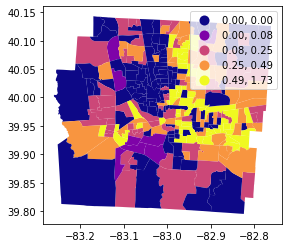

In [128]:
A2_new = np.empty([I, K2])
for k2 in range(K2):
    for j in range(I):
        sum = 0
        for i in V[k]:
            if i != j:
                sum += theta2_all[i, j, k2] * A2[i, k2]
        A2_new[j, k2] = theta2_all[j, j, k2] * A2[j, k2] + sum
A2_new = pd.DataFrame(A2_new)
A2_new["TRACT"] = hist2["TRACT"]

merged = merged.join(A2_new.set_index('TRACT'))
merged["0101_pct_after"] = merged[8]/(merged[0]+merged[1]+merged[2]+merged[3]+merged[4]+merged[5]+merged[6]+merged[7]+merged[8]+merged[9]+merged[10]+merged[11]+merged[12]+merged[13]) * 100
merged = merged.sort_index()
merged.plot(column=merged["0101_pct_after"], scheme='quantiles', cmap='plasma', legend=True)

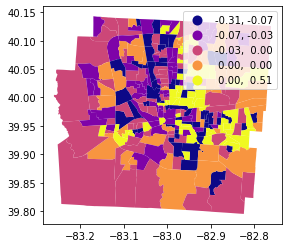

In [129]:
merged["0101_pct_dif"] = merged["0101_pct_after"] - merged["0101_pct_before"]
merged.plot(column=merged["0101_pct_dif"], scheme='quantiles', cmap='plasma', legend=True)